In [17]:
import pandas as pd
df_train = pd.read_pickle('../data/out5/train5_0.1.pkl')
df_test = pd.read_pickle('../data/out5/test5.pkl')
doc_info = pd.read_pickle('../data/out1/doc_info1.pkl')
user_info = pd.read_pickle('../data/out1/user_info1.pkl')

user_doc_=pd.read_pickle('../data/userid_docid_ana.pkl')
user_=pd.read_pickle('../data/userid_.pkl')
doc_=pd.read_pickle('../data/docid_.pkl')


In [18]:
category1st_=pd.read_pickle('../data/category1st_.pkl')
category2nd_=pd.read_pickle('../data/category2nd_.pkl')
keyword0_=pd.read_pickle('../data/keyword0_.pkl')

In [16]:
df_test_user=pd.merge(df_test,user_info,on='userid')
df_test_user_doc=pd.merge(df_test_user,doc_info,on='docid')
# print(df_test_user_doc)

In [21]:
def fill_(pdd,s):
    mean=pdd[s].mean()
    pdd[s].fillna(mean, inplace=True)
    return pdd
    

In [18]:
s_l=''
print(df_test_user_doc.shape)
df_test_user_doc=pd.merge(df_test_user_doc,user_doc_,how='left',on=['userid','docid'])
print(df_test_user_doc.shape)

df_test_user_doc=pd.merge(df_test_user_doc,user_,how='left',on='userid')
print(df_test_user_doc.shape)

df_test_user_doc=pd.merge(df_test_user_doc,doc_,how='left',on='docid')
print(df_test_user_doc.shape)

df_test_user_doc=pd.merge(df_test_user_doc,category1st_,how='left',on='category1st')
print(df_test_user_doc.shape)

df_test_user_doc=pd.merge(df_test_user_doc,category2nd_,how='left',on='category2nd')
print(df_test_user_doc.shape)

df_test_user_doc=pd.merge(df_test_user_doc,keyword0_,how='left',on='keyword0')
print(df_test_user_doc.shape)

from tqdm import tqdm
s_l=['userid_docid_click', 'userid_docid_duration',
       'userid_click_mean', 'userid_click_count', 'userid_duration_mean',
       'userid_picnum_mean', 'docid_click_mean', 'docid_click_count',
       'docid_duration_mean', 'docid_picnum_mean', 'category1st_click_mean',
       'category1st_click_count', 'category1st_duration_mean',
       'category1st_picnum_mean', 'category2nd_click_mean',
       'category2nd_click_count', 'category2nd_duration_mean',
       'category2nd_picnum_mean', 'keyword0_click_mean',
       'keyword0_click_count', 'keyword0_duration_mean',
       'keyword0_picnum_mean']
for s in tqdm(s_l):
    df_test_user_doc=fill_(df_test_user_doc,s)
    
print(df_test_user_doc.shape)
print(df_test_user_doc)

(50000, 21)
(50000, 23)
(50000, 27)
(50000, 31)
(50000, 35)
(50000, 39)
(50000, 43)


100%|██████████| 22/22 [00:00<00:00, 1343.04it/s]

(50000, 43)
          id      userid      docid  network  refresh  hour  device  os  \
0          0  2204868548  464495940        2        4   4.0    1479   0   
1      27753  2437250736  464495940        2        5   6.0    1141   0   
2        474  2438998792  464495940        5        1   6.0    1637   0   
3        698  2432572826  464495940        2        2   3.0    1141   0   
4        926  1346229152  464495940        5       19   4.0    1875   0   
...      ...         ...        ...      ...      ...   ...     ...  ..   
49995  49949  2207482852  464480961        2        1   4.0     922   0   
49996  49954  2383238114  463847183        2        0   4.0    1235   0   
49997  49961  2423678208  464196866        2        9   8.0    1587   0   
49998  49975  1622401482  464644801        2        8   6.0     887   0   
49999  49991  2423879412  464498533        2        3   0.0    2367   0   

       province  city  ...  category1st_duration_mean  \
0           224   506  ...    

In [19]:
df_test_user_doc.sort_values("id",inplace=True)
df_test_user_doc.index = range(len(df_test_user_doc))
del df_test_user_doc['id']
print(df_test_user_doc)

           userid      docid  network  refresh  hour  device  os  province  \
0      2204868548  464495940        2        4   4.0    1479   0       224   
1      1623790870  464553715        2        2  12.0    2810   0       216   
2      1637010070  464687570        2       10  10.0    1224   0       280   
3      1634251474  464661865        2       10   8.0     980   0       242   
4      2352721164  464692079        2       11   7.0    1785   0       195   
...           ...        ...      ...      ...   ...     ...  ..       ...   
49995  1640585246  464553715        2        1   8.0    1576   0       220   
49996  1987843480  464382231        2        1   4.0    1602   0       224   
49997  2391080328  464617167        5        1   6.0     863   0       242   
49998   125699342  464172118        2       11   7.0     575   0       200   
49999  2154437014  464225813        2        3   4.0    1264   0       208   

       city  age  ...  category1st_duration_mean  category1st_p

In [20]:
print(df_test_user_doc.columns)

Index(['userid', 'docid', 'network', 'refresh', 'hour', 'device', 'os',
       'province', 'city', 'age', 'gender', 'pubtime', 'picnum', 'category1st',
       'category2nd', 'keyword0', 'keyword1', 'keyword2', 'keyword3',
       'keyword4', 'userid_docid_click', 'userid_docid_duration',
       'userid_click_mean', 'userid_click_count', 'userid_duration_mean',
       'userid_picnum_mean', 'docid_click_mean', 'docid_click_count',
       'docid_duration_mean', 'docid_picnum_mean', 'category1st_click_mean',
       'category1st_click_count', 'category1st_duration_mean',
       'category1st_picnum_mean', 'category2nd_click_mean',
       'category2nd_click_count', 'category2nd_duration_mean',
       'category2nd_picnum_mean', 'keyword0_click_mean',
       'keyword0_click_count', 'keyword0_duration_mean',
       'keyword0_picnum_mean'],
      dtype='object')


In [19]:
df_train_user=pd.merge(df_train,user_info,on='userid')
df_train_user_doc=pd.merge(df_train_user,doc_info,on='docid')
# print(df_train_user_doc)

In [20]:
print(df_train_user_doc.shape)
df_train_user_doc=pd.merge(df_train_user_doc,user_doc_,how='left',on=['userid','docid'])
print(df_train_user_doc.shape)
df_train_user_doc=pd.merge(df_train_user_doc,user_,how='left',on='userid')
print(df_train_user_doc.shape)
df_train_user_doc=pd.merge(df_train_user_doc,doc_,how='left',on='docid')
print(df_train_user_doc.shape)
df_train_user_doc=pd.merge(df_train_user_doc,category1st_,how='left',on='category1st')
print(df_train_user_doc.shape)
df_train_user_doc=pd.merge(df_train_user_doc,category2nd_,how='left',on='category2nd')
print(df_train_user_doc.shape)
df_train_user_doc=pd.merge(df_train_user_doc,keyword0_,how='left',on='keyword0')
print(df_train_user_doc.shape)




(8167113, 21)
(8167113, 23)
(8167113, 27)
(8167113, 31)
(8167113, 35)
(8167113, 39)
(8167113, 43)


  0%|          | 0/22 [00:00<?, ?it/s]


NameError: name 'fill_' is not defined

In [22]:
print(df_train_user_doc.shape)
from tqdm import tqdm
s_l=['userid_docid_click', 'userid_docid_duration',
       'userid_click_mean', 'userid_click_count', 'userid_duration_mean',
       'userid_picnum_mean', 'docid_click_mean', 'docid_click_count',
       'docid_duration_mean', 'docid_picnum_mean', 'category1st_click_mean',
       'category1st_click_count', 'category1st_duration_mean',
       'category1st_picnum_mean', 'category2nd_click_mean',
       'category2nd_click_count', 'category2nd_duration_mean',
       'category2nd_picnum_mean', 'keyword0_click_mean',
       'keyword0_click_count', 'keyword0_duration_mean',
       'keyword0_picnum_mean']
for s in tqdm(s_l):
    df_train_user_doc=fill_(df_train_user_doc,s)

print(df_train_user_doc.shape)
print(df_train_user_doc)

(8167113, 43)


100%|██████████| 22/22 [00:00<00:00, 33.18it/s]


(8167113, 43)
             userid      docid  network  refresh  click  hour  device  os  \
0        1297726476  463328005        2        6      0   8.0     799   0   
1        1492718432  463328005        2       17      0   7.0     996   0   
2        2434235808  463328005        5       11      0   4.0    1137   0   
3        1393926110  463328005        2       12      0   8.0    2300   0   
4        1845213224  463328005        2       40      0   6.0    1586   0   
...             ...        ...      ...      ...    ...   ...     ...  ..   
8167108  1421139938  463405589        5        1      0   6.0    1492   0   
8167109  2438001810  463440175        2        3      0  12.0     446   0   
8167110  1228279408  461988427        2        4      0   8.0    2636   1   
8167111  1520771468  463051210        5        1      0   6.0    1584   0   
8167112  1891109952  462018452        5        3      0   0.0    1260   0   

         province  city  ...  category1st_duration_mean  \
0 

In [23]:
print(df_train_user_doc.columns)

Index(['userid', 'docid', 'network', 'refresh', 'click', 'hour', 'device',
       'os', 'province', 'city', 'age', 'gender', 'pubtime', 'picnum',
       'category1st', 'category2nd', 'keyword0', 'keyword1', 'keyword2',
       'keyword3', 'keyword4', 'userid_docid_click', 'userid_docid_duration',
       'userid_click_mean', 'userid_click_count', 'userid_duration_mean',
       'userid_picnum_mean', 'docid_click_mean', 'docid_click_count',
       'docid_duration_mean', 'docid_picnum_mean', 'category1st_click_mean',
       'category1st_click_count', 'category1st_duration_mean',
       'category1st_picnum_mean', 'category2nd_click_mean',
       'category2nd_click_count', 'category2nd_duration_mean',
       'category2nd_picnum_mean', 'keyword0_click_mean',
       'keyword0_click_count', 'keyword0_duration_mean',
       'keyword0_picnum_mean'],
      dtype='object')


In [24]:
df_train_user_doc['click'].mean()

0.14465711445403046

In [ ]:
# from tqdm import tqdm
# import numpy as np
# for i in df_train_user_doc.columns:
#     print(i)
#     for index,j in tqdm(enumerate(df_train_user_doc[i])):
#         if np.isnan(j):
#             print(df_train_user_doc[i].mean())
#             df_train_user_doc[i][index]=df_train_user_doc[i].mean()

    

In [ ]:
# import numpy as np
# print(df_train_user_doc.describe())
# # 数据集概览
# print(df_train_user_doc.head(5))
# # 前5行


In [ ]:
# from tqdm import tqdm
# for i in tqdm(df_train_user_doc.columns):
#     print(i)
#     df_train_user_doc[i].fillna((df_train_user_doc[i].mean()), inplace=True)

In [ ]:
# for i in tqdm(df_test_user_doc.columns):
#     print(i)
#     df_test_user_doc[i].fillna((df_test_user_doc[i].mean()), inplace=True)

In [25]:
# df_train_user_doc.to_pickle('../data/out5/df_train_user_doc5_mean_f_0.1.pkl')
# df_test_user_doc.to_pickle('../data/out5/df_test_user_doc5_mean_f.pkl')

In [1]:
import pandas as pd
df_train_user_doc=pd.read_pickle('../data/out5/df_train_user_doc5_mean_f.pkl')
df_test_user_doc=pd.read_pickle('../data/out5/df_test_user_doc5_mean_f.pkl')


In [2]:
# nono=['click','dt','date','duration','position','userid_docid_click','userid_docid_duration','userid_click_mean','userid_duration_mean','docid_click_mean','keyword0_click_mean']
# for i in df_train_user_doc.columns:
#     if 'click' in i and i not in nono:
#         nono.append(i)
# print(nono)
nono=['click','dt','date','duration','position','userid_docid_click','userid_docid_duration','userid_duration_mean','userid_click_mean','docid_click_mean']


In [3]:
from sklearn.model_selection import train_test_split
x_columns = [x for x in df_train_user_doc.columns if x not in nono]
print(x_columns)
X = df_train_user_doc[x_columns]      # 样本
y = df_train_user_doc['click']    # 标签

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=9)


['userid', 'docid', 'network', 'refresh', 'hour', 'device', 'os', 'province', 'city', 'age', 'gender', 'pubtime', 'picnum', 'category1st', 'category2nd', 'keyword0', 'keyword1', 'keyword2', 'keyword3', 'keyword4', 'userid_click_count', 'userid_picnum_mean', 'docid_click_count', 'docid_duration_mean', 'docid_picnum_mean', 'category1st_click_mean', 'category1st_click_count', 'category1st_duration_mean', 'category1st_picnum_mean', 'category2nd_click_mean', 'category2nd_click_count', 'category2nd_duration_mean', 'category2nd_picnum_mean', 'keyword0_click_mean', 'keyword0_click_count', 'keyword0_duration_mean', 'keyword0_picnum_mean']


In [6]:
from sklearn import metrics
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    boosting_type='gbdt',  # 提升树的类型 gbdt,dart,goss,rf
    num_leaves=31,  #树的最大叶子数，对比xgboost一般为2^(max_depth)
    max_depth=-1,  #最大树的深度
    learning_rate=0.1,  #学习率
    n_estimators=100,  # 拟合的树的棵树，相当于训练轮数
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,  # 最小分割增益
    min_child_weight=0.001,  # 分支结点的最小权重
    min_child_samples=20,
    subsample=1.0,  # 训练样本采样率 行
    subsample_freq=0,  # 子样本频率
    colsample_bytree=1.0,  # 训练特征采样率 列
    reg_alpha=0.0,  # L1正则化系数
    reg_lambda=0.0,  # L2正则化系数
    random_state=None,
    n_jobs=-1,
    silent=True,
)
clf.fit(x_train, y_train, eval_metric='roc_auc')
#设置验证集合 verbose=False不打印过程
# clf.fit(X_train, y_train)

# y_true, y_pred = y_test, clf.predict(X_test)
# print("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))

/data/fuwen/anaconda3/envs/bj2/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(silent=True)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
gbm2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=60,max_depth=7, min_samples_leaf =60,
               min_samples_split =1000, max_features=9, subsample=0.8, random_state=9)
gbm2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features=9,
                           min_samples_leaf=60, min_samples_split=1000,
                           n_estimators=60, random_state=9, subsample=0.8)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=9)
gbm0.fit(x_train, y_train)

GradientBoostingClassifier(random_state=9)

In [7]:
gbm=clf
import time

In [8]:
import joblib
end=time.time()
joblib.dump(gbm, '../data/out5/gbm5_'+str(end)+'.model')
gbm = joblib.load('../data/out5/gbm5_'+str(end)+'.model')

In [9]:
from sklearn.metrics import roc_auc_score,accuracy_score
print("tr-accuracy: %.4g" % accuracy_score(y_train.values, gbm.predict(x_train)))      # Accuracy : 0.9855
print("tr-AUC: %f" % roc_auc_score(y_train, gbm.predict_proba(x_train)[:, 1]))      # AUC Score (Train): 0.910597

print("val-accuracy: %.4g" % accuracy_score(y_val, gbm.predict(x_val)))      # Accuracy : 0.9825
print("val-AUC: %f" % roc_auc_score(y_val, gbm.predict_proba(x_val)[:, 1]))      # AUC Score (Train): 0.827217

tr-accuracy: 0.856
tr-AUC: 0.711956
val-accuracy: 0.8548
val-AUC: 0.699833


               feature_name  importance
23      docid_duration_mean         292
33      keyword0_click_mean         258
21       userid_picnum_mean         255
20       userid_click_count         250
3                   refresh         188
22        docid_click_count         188
35   keyword0_duration_mean         171
0                    userid         126
5                    device         104
32  category2nd_picnum_mean          81
29   category2nd_click_mean          77
7                  province          75
8                      city          64
36     keyword0_picnum_mean          61
12                   picnum          60
16                 keyword1          56
18                 keyword3          53
17                 keyword2          51
19                 keyword4          51
9                       age          51


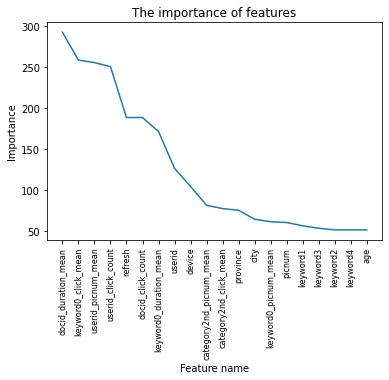

In [10]:
import matplotlib.pyplot as plt
def plot_feature_importance(dataset, model_bst):
    list_feature_name = list(dataset.columns[:])
    # list_feature_importance = list(model_bst.feature_importance(importance_type='split', iteration=-1))
    list_feature_importance = list(model_bst.feature_importances_)
    dataframe_feature_importance = pd.DataFrame(
        {'feature_name': list_feature_name, 'importance': list_feature_importance})
    dataframe_feature_importance20 = dataframe_feature_importance.sort_values(by='importance', ascending=False)[:20]
    print(dataframe_feature_importance20)
    x = range(len(dataframe_feature_importance20['feature_name']))
    plt.xticks(x, dataframe_feature_importance20['feature_name'], rotation=90, fontsize=8)
    plt.plot(x, dataframe_feature_importance20['importance'])
    plt.xlabel("Feature name")
    plt.ylabel("Importance")
    plt.title("The importance of features")
    plt.show()


# gbm6 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=160,max_depth=7, min_samples_leaf =60,
#                    min_samples_split =1200, max_features=9, subsample=0.7, random_state=2019)

# gbm6.fit(x_train, y_train)

plot_feature_importance(x_train, gbm)


In [11]:
x_columns_0 = [x for x in df_test_user_doc.columns if x not in nono]
X_0 = df_test_user_doc[x_columns_0]      # 样本
print(X_0[0:1])

       userid      docid  network  refresh  hour  device  os  province  city  \
0  2204868548  464495940        2        4   4.0    1479   0       224   506   

   age  ...  category1st_duration_mean  category1st_picnum_mean  \
0    2  ...                  20.428518                12.838544   

   category2nd_click_mean  category2nd_click_count  category2nd_duration_mean  \
0                0.137778                  6165238                  20.454347   

   category2nd_picnum_mean  keyword0_click_mean  keyword0_click_count  \
0                11.771575             0.129254                2909.0   

   keyword0_duration_mean  keyword0_picnum_mean  
0               36.446889             21.966999  

[1 rows x 37 columns]


In [12]:
y_pre_0=gbm.predict_proba(X_0)[:, 1]
table=pd.DataFrame(y_pre_0)
end=time.time()
table.to_csv('../data/out5/y_pre_'+str(end)+'.csv',header=0)

In [11]:
# import time
# end=time.time()
# def store_list(lsit,text_path):
#     ff = open(text_path, encoding='utf-8', mode='w')
#     for line_list in lsit:
#         ff.write(str(line_list))  # 写入一个新文件中
#         ff.write("\n")
# store_list(y_pre_0,'../data/out5/y_pre_'+str(end)+'.txt')